In [350]:
#import user modules
import utils.helper_functions as hfun
import config as cf
import thouless_times as thouless
import costfun.costfun as cost
import importlib
importlib.reload(hfun)
importlib.reload(cf)
importlib.reload(thouless)
importlib.reload(cost)

from utils.fit_functions import *

#--- importet in user module
import matplotlib.pyplot as plt
from matplotlib.markers import MarkerStyle
import matplotlib
import os

#--- other modules
import numpy as np
import pandas as pd
import random
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import copy
#plt.style.use(['science','ieee','no-latex'])

# get all the colors
from scipy.special import binom
from scipy.optimize import curve_fit as fit

print(cf.base_directory)


user_settings = getattr(cf.plot_settings, 'settings')
a = np.array([[0, 1, 0, 1, 2],
       [2, 3, 3, 2, 7]])
print(a[0])
print(np.transpose(a)[0])

../results/Heisenberg/disorder/PBC/
[0 1 0 1 2]
[0 2]


In [351]:

def typical(data):
    return np.exp(np.sum(np.log(data) / len(data)))

basedir = "./CriticalParameters/"
sizes = range(12, 19, 2)
def load_critical_data(crit_fun = 'free', scaling_ansatz = 'FGR', set_class = None):
    if set_class is None: set_class = cf.plot_settings
    settings = getattr(set_class, 'settings')
    vs = settings['vs']

    cost_fun = []
    crit_exp = []
    crit_pars = []
    critical_fun = cost.crit_functions_dict[crit_fun]
    for file in os.listdir(basedir):
        info = hfun.remove_info(hfun.info_param(cf.params_arr), settings['scaling'], settings['vs'])
        prefix = "GapRatio" + info + "_critfun=%s_ansatz=%s_pert=%s_seed"%(crit_fun, scaling_ansatz, vs)
        if file.startswith(prefix):
            file = basedir + file
            if os.path.exists(file):
                data = np.load(file)
                cost_fun.append(data['costfun'])
                crit_exp.append(data["crit exp'"])
                critics = []
                for i in range(len(data) - 2):
                    critics.append(data["x_%d"%i])
                crit_pars.append(np.array(critics))
    
    num_of_sizes = len(crit_pars[0])
    crit_pars = np.transpose(crit_pars)
    return np.array(cost_fun), np.array(crit_exp), np.array(crit_pars), num_of_sizes

set_class = copy.deepcopy(cf.plot_settings)
set_class.set_scaling('L')
set_class.set_vs('g')
settings = getattr(set_class, 'settings')
cost_fun, crit_exp, crit_pars, num_of_crit = load_critical_data(set_class=set_class)



print(typical(crit_exp))
print([typical(crit_pars[i]) for i in range(num_of_crit)])


1.254139846850816
[0.3134826534892525, 0.21475842391501498, 0.1439406874920643, 0.09516707025060915]


In [352]:

def plot_dist(vs = 'g', crit_fun = 'free', scaling_ansatz = 'FGR'):
    set_class = copy.deepcopy(cf.plot_settings)
    set_class.set_scaling('L')
    set_class.set_vs(vs)
    settings = getattr(set_class, 'settings')
    fig, (ax1, ax2, ax3) = plt.subplots( nrows=1, ncols=3, figsize=(10,4), dpi = 100, constrained_layout=True, sharey=False)    

    cost_fun, crit_exp, crit_pars, num_of_crit = load_critical_data(crit_fun=crit_fun, scaling_ansatz=scaling_ansatz, set_class=set_class)

    ylab = hfun.var_name if settings['vs_idx'] == 2 else settings['vs']
    ax1.hist(crit_exp, bins = 30)
    ax1.set_title("critical exponent- " + r"$\nu$" + "\n -distribution")
    sizes = np.array(range(12, 19, 2))

    for i in range(num_of_crit):
        ax2.hist(crit_pars[i], bins = 30, label=r"$L=%d$"%(sizes[i]), histtype='bar', linewidth=3, stacked=True)

    hist, edge = np.histogram((crit_pars[-1]), bins = 30)
    ax2.set_ylim( None, 1.5*max( hist ) )

    ax2.set_title(r"$%s_c$"%ylab + " distribution\n for each system size")
    for i in range(num_of_crit):
        ax3.hist(np.log10(crit_pars[i]), bins = 30, label=r"$L=%d$"%(sizes[i]), histtype='step', linewidth=3)
    ax3.set_title(r"$log_{10}%s_c$"%ylab + " distribution\n for each system size")
    
    hist, edge = np.histogram(np.log10(crit_pars[-1]), bins = 30)
    ax3.set_ylim( None, 1.5*max( hist ) )
    
    ax2.legend(fontsize=8)
    ax3.legend(fontsize=8, loc='upper left')
    print(typical(crit_exp))
    print([typical(crit_pars[i]) for i in range(num_of_crit)])
    lab = hfun.var_name if settings['vs_idx'] == 2 else vs
    fig.suptitle("Scaling ansatz:\t" + r"$%s$"%cost.scale_ansatz_label[scaling_ansatz](lab), fontsize=16)


# DISTRIBUTION $w=0.7=const$

3.731092800008905
[547.940831723788, 49.168463410860795, 43.16374029352251, 53.49908857095948]
0.2435061453980852
[185.79226444994987, 75.47331865860936, 127.18304386308044, 609.4162191629457]
1.2542179644689209
[573.6239099463096, 55.71923221009903, 42.60670808218171, 44.521356270198545]
0.2683332757969995
[536.3680668762404, 49.30959242549436, 43.222387573900924, 53.631569507275465]


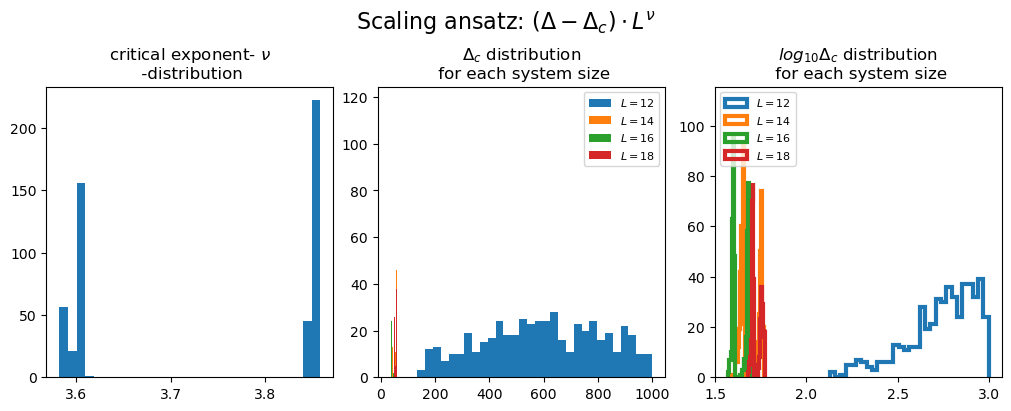

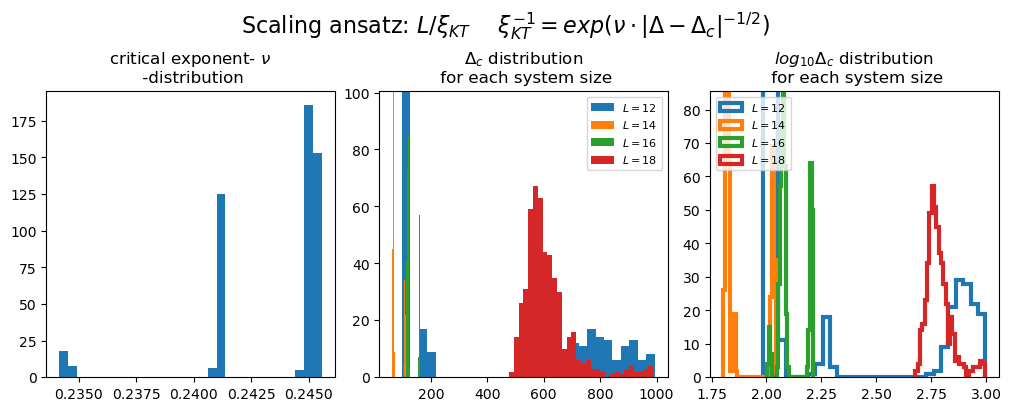

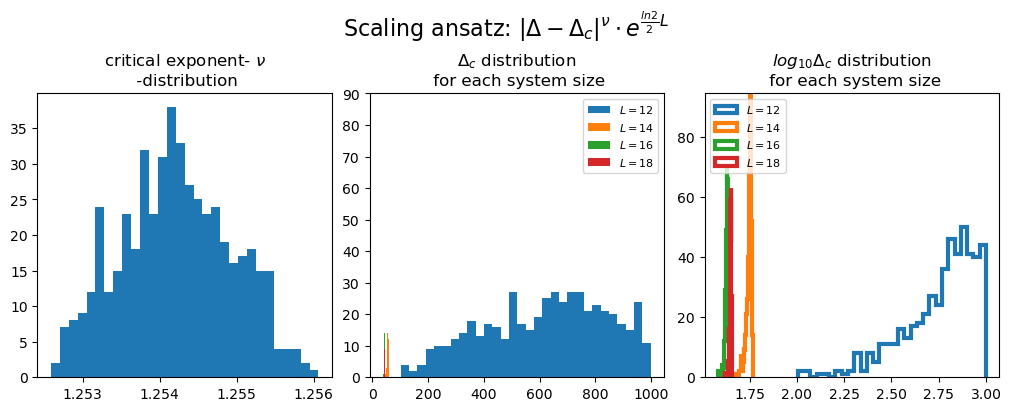

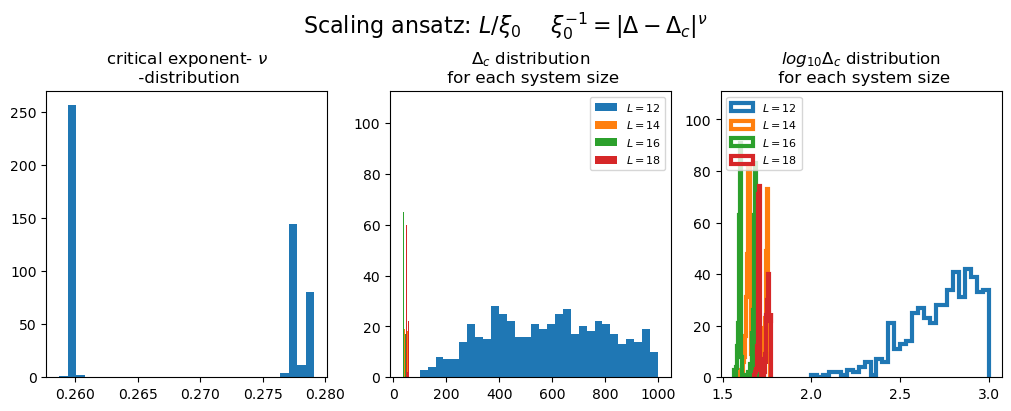

In [353]:
plot_dist(vs='g', scaling_ansatz='classic', crit_fun='free_inv')
plot_dist(vs='g', scaling_ansatz='KT', crit_fun='free_inv')
plot_dist(vs='g', scaling_ansatz='FGR', crit_fun='free_inv')
plot_dist(vs='g', scaling_ansatz='RG', crit_fun='free_inv')

# DISTRIBUTIONS $\Delta=0.55=const$

0.8459852607301727
[0.5202737986371849, 0.2933719574054063, 0.21441163784528286, 0.1354555084022178]
0.41867751037125384
[0.7431556502809752, 0.4413644904938255, 0.29231338513386734, 0.2017823436152664]
0.8922616692233905
[0.24267332645053233, 0.13406222477685487, 0.07493314260355556, 0.04264871707974179]
0.20972288102725364
[0.26472611815293656, 0.14804959804634463, 0.08362704141061288, 0.04994663083013951]


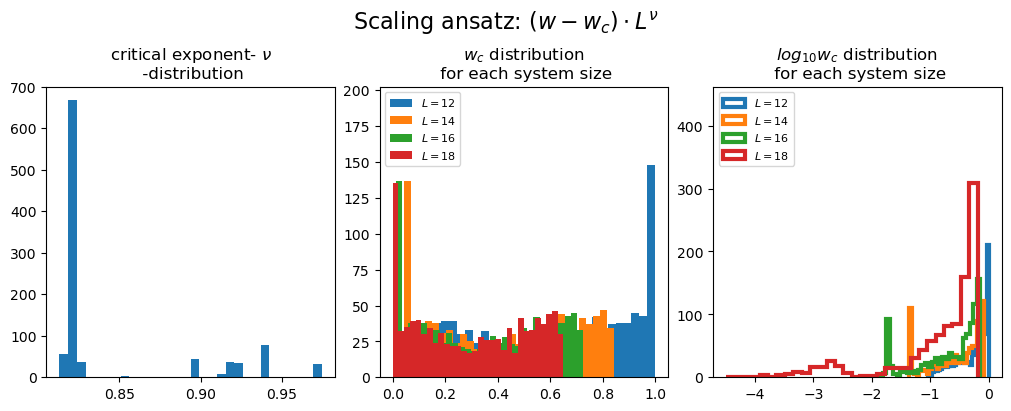

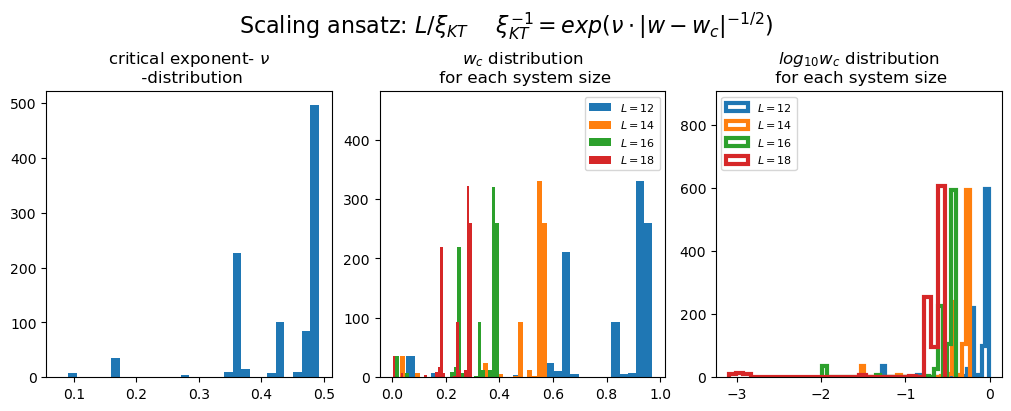

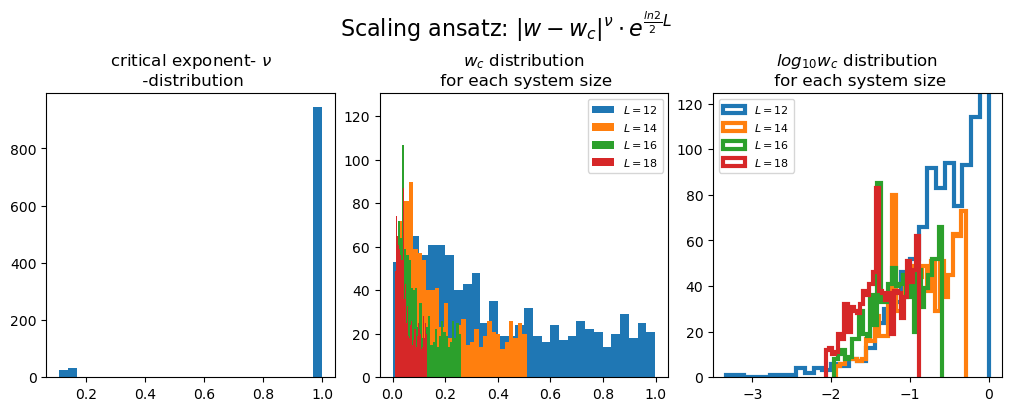

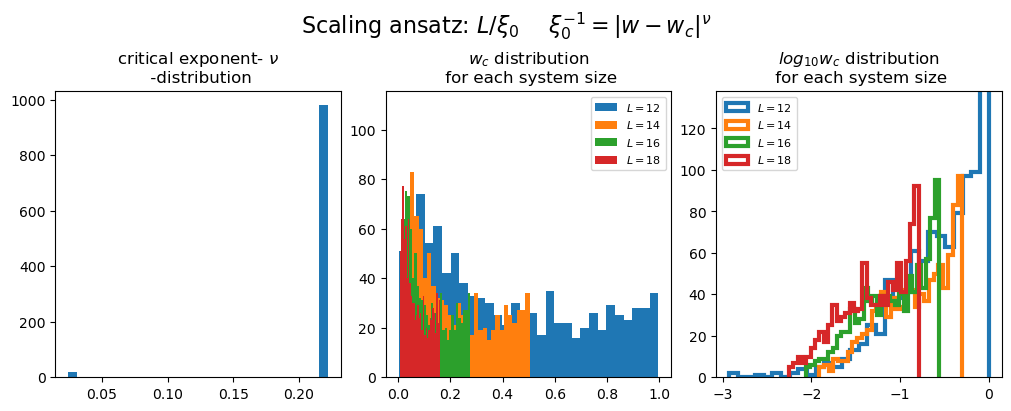

In [354]:

plot_dist(vs='w', scaling_ansatz='classic', crit_fun='free')
plot_dist(vs='w', scaling_ansatz='KT', crit_fun='free')
plot_dist(vs='w', scaling_ansatz='FGR', crit_fun='free')
plot_dist(vs='w', scaling_ansatz='RG', crit_fun='free')

# SCALING ANSAETZE

In [355]:
def plot_gaps(axis, vs = 'g', crit_fun = 'free', scaling_ansatz = 'FGR', fit_func = power_law):
    set_class = copy.deepcopy(cf.plot_settings)
    set_class.set_scaling('L')
    set_class.set_vs(vs)
    settings = getattr(set_class, 'settings')
    cost_fun, crit_exp, crit_pars, num_of_sizes = load_critical_data(crit_fun=crit_fun, scaling_ansatz=scaling_ansatz, set_class=set_class)
    
    lab = hfun.var_name if settings['vs_idx'] == 2 else vs
    cost_fun = np.mean(cost_fun)
    crit_exp = np.mean(crit_exp)
    crit_pars = np.array([np.median(crit_pars[i]) for i in range(num_of_sizes)])
    
    vals, xvals, tau, gap_ratio = thouless.load(settings=settings)
    rescale_fun = cost.resc_functions_dict[scaling_ansatz]
    critical_fun = cost.crit_functions_dict[crit_fun]
    for i in range(num_of_sizes):
        xpoints = rescale_fun(xvals[i], vals[i], critical_fun, crit_exp, *crit_pars)
        axis.scatter(xpoints, gap_ratio[i])
    
    xlab = cost.scale_ansatz_label[scaling_ansatz](lab)
    
    hfun.set_plot_elements(axis = axis, ylabel = "r", xlabel = xlab, settings=settings, 
                            font_size=8, set_legend=False, xlim=(None, None), ylim=(None, None))
    axis.set_xscale('linear')
    axis.set_yscale('linear')
    
    axis.axhline(y=0.5307, ls='--', color='black')
    axis.axhline(y=0.3867, ls='--', color='black')

    left, bottom, width, height = [0.55, 0.25, 0.4, 0.4]
    ax = hfun.add_subplot_axes(axis, [left, bottom, width, height])
    sizes = np.array([12 + 2 * i for i in range(num_of_sizes)])

    pars, pcov = fit(f=fit_func, 
                            xdata=sizes, 
                            ydata=crit_pars)
    ax.scatter(sizes, crit_pars)
    fit_name = None
    if fit_func == exp_fit:
        ax.plot(sizes, fit_func(sizes - 12., 2. / np.log(2), crit_pars[0]), linestyle='--', color='black', label=r"$\sqrt{D}$")
        ax.plot(sizes, fit_func(sizes - 12., 3. / np.log(2), crit_pars[0]), linestyle='--', color='red', label=r"$\sqrt[3]{D}$")
        fit_name = r"$e^{-L/%.2f}$"%pars[0]
    elif fit_func == power_law:
        ax.plot(sizes, fit_func(sizes.astype(float)/12, -2., crit_pars[0]), linestyle='--', color='black', label=r"$L^{2}$")
        ax.plot(sizes, fit_func(sizes.astype(float)/12, -3., crit_pars[0]), linestyle='--', color='red', label=r"$L^{3}$")
        fit_name = r"$L^{%.2f}$"%pars[0]

    ax.plot(sizes, fit_func(sizes, pars[0], pars[1]), linestyle='--', color='blue', label=fit_name)
    hfun.set_plot_elements(axis = ax, ylabel = lab + "_c", xlabel = "L", settings=settings, 
                            font_size=8, set_legend=True, xlim=(None, None), ylim=(None, None))
    ax.set_xscale('linear')
    ax.xaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: "%d"%x))
    ax.xaxis.set_minor_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: "%d"%x))
    #ax.yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: "%.2f"%x))
    #ax.yaxis.set_minor_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: "%.2f"%x))
    
    ax.set_title(r"$CF=%.4f$"%cost_fun)


[12 14 16 18]
[12 14 16 18]
[12 14 16 18]
[12 14 16 18]


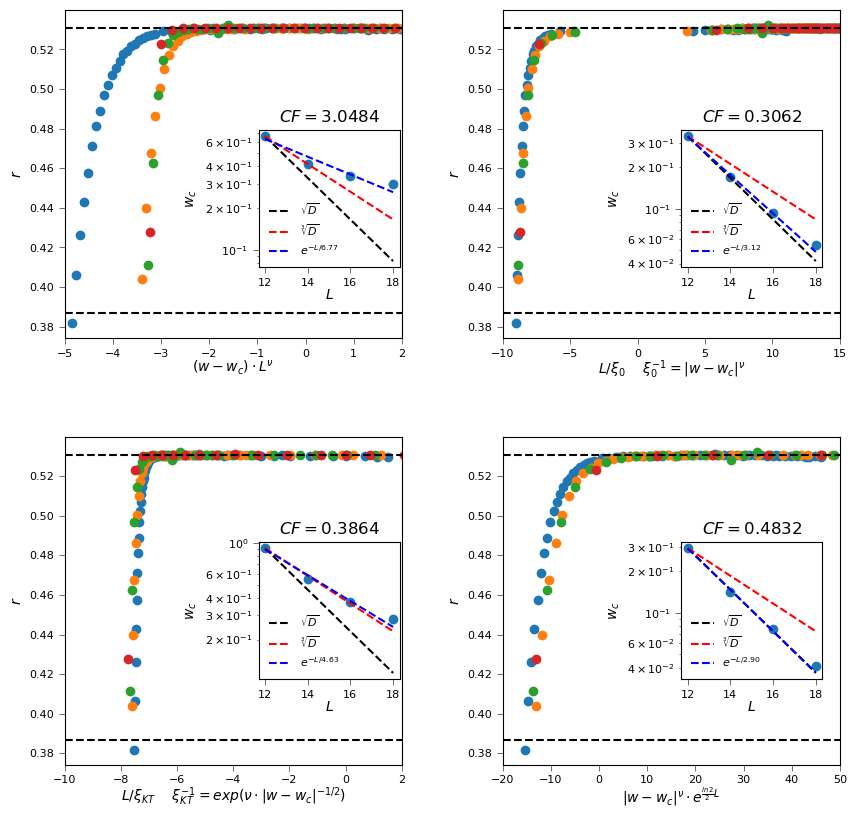

In [356]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots( nrows=2, ncols=2, figsize=(10,10), dpi = 100)


plot_gaps(ax1, vs = 'w', scaling_ansatz='classic', fit_func=exp_fit)
ax1.set_xlim(-5, 2)
plot_gaps(ax2, vs = 'w', scaling_ansatz='RG', fit_func=exp_fit)
ax2.set_xlim(-10, 15)
plot_gaps(ax3, vs = 'w', scaling_ansatz='KT', fit_func=exp_fit)
ax3.set_xlim(-10, 2)
plot_gaps(ax4, vs = 'w', scaling_ansatz='FGR', fit_func=exp_fit)
ax4.set_xlim(-20, 50)

fig.subplots_adjust(wspace=0.3, hspace=0.3)

[12 14 16 18]
[12 14 16 18]
[12 14 16 18]
[12 14 16 18]


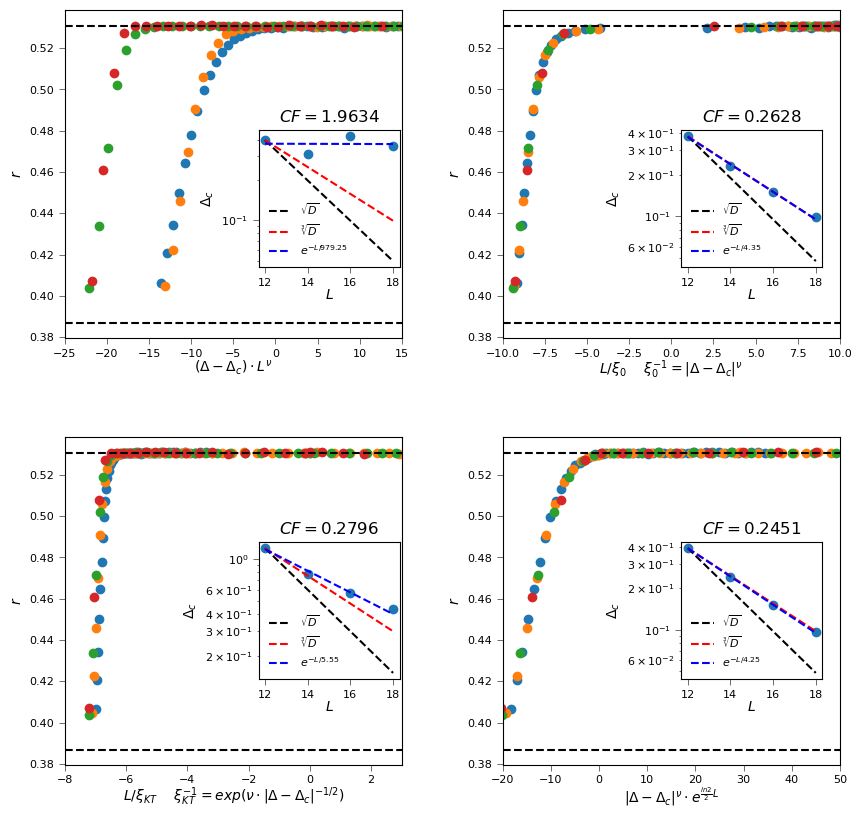

In [357]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots( nrows=2, ncols=2, figsize=(10,10), dpi = 100)


plot_gaps(ax1, vs = 'g', scaling_ansatz='classic', fit_func=exp_fit)
ax1.set_xlim(-25, 15)
plot_gaps(ax2, vs = 'g', scaling_ansatz='RG', fit_func=exp_fit)
ax2.set_xlim(-10, 10)
plot_gaps(ax3, vs = 'g', scaling_ansatz='KT', fit_func=exp_fit)
ax3.set_xlim(-8, 3)
plot_gaps(ax4, vs = 'g', scaling_ansatz='FGR', fit_func=exp_fit)
ax4.set_xlim(-20, 50)

fig.subplots_adjust(wspace=0.3, hspace=0.3)